# ESTANDARIZACIÓN

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import itertools
# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_pickle("datos/bikes_clean_pickle.pkl")
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,holiday,Monday,weekend or holiday,cloudy,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,not holiday,Tuesday,workingday,cloudy,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,not holiday,Wednesday,workingday,clear,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,not holiday,Thursday,workingday,clear,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,not holiday,Friday,workingday,clear,9.305237,43.6957,12.522300,82,1518


In [3]:
# separamos las variables numéricas
numericas = df.select_dtypes(include= np.number)
numericas.drop(['year', 'month'], axis= 1, inplace=True)
numericas.sample()

,temp,hum,windspeed,casual,registered
621,25.966653,67.25,6.958821,1379,6630


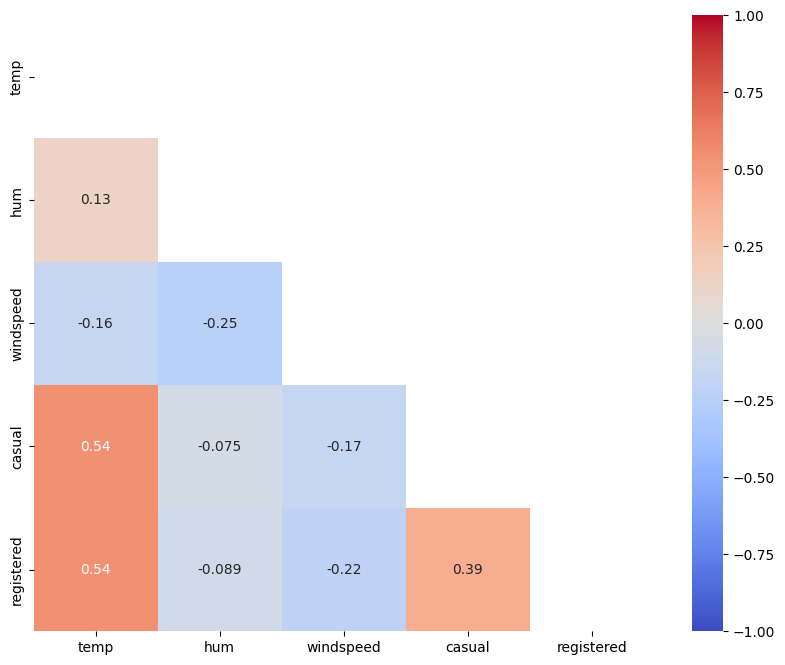

In [4]:
# sacamos la matriz de correlación 
mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool_))
sns.heatmap(numericas.corr(),
             cmap = 'coolwarm',
             annot = True,
             mask = mask,
             vmin = -1,
             vmax= 1);

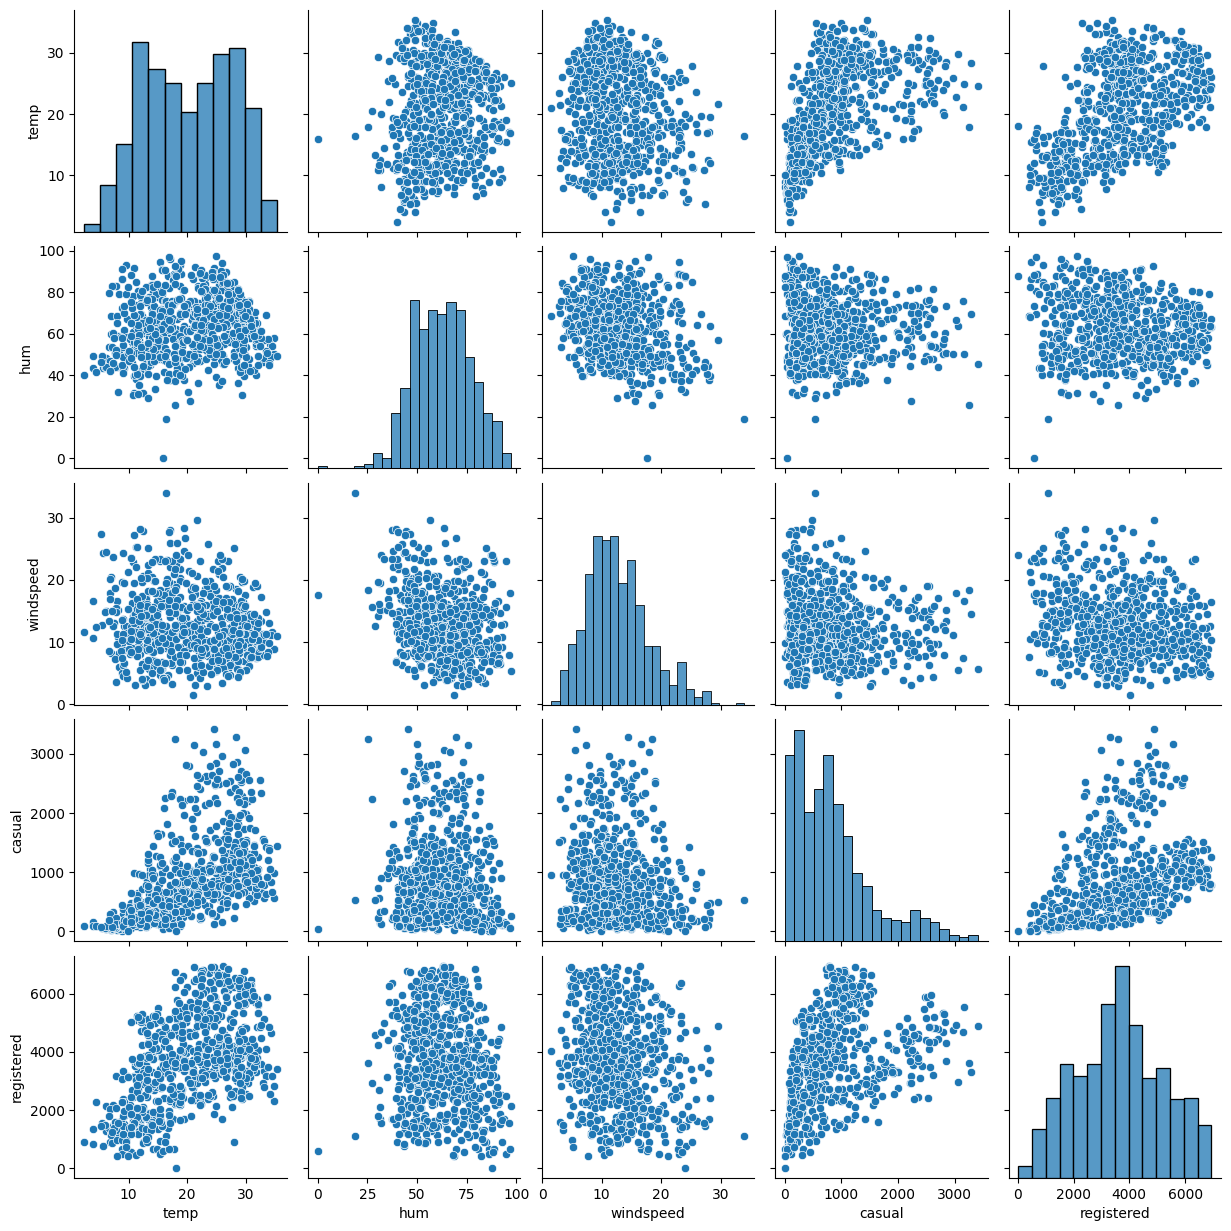

In [5]:
sns.pairplot(numericas);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    int64         
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weather     730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 79.8+ KB


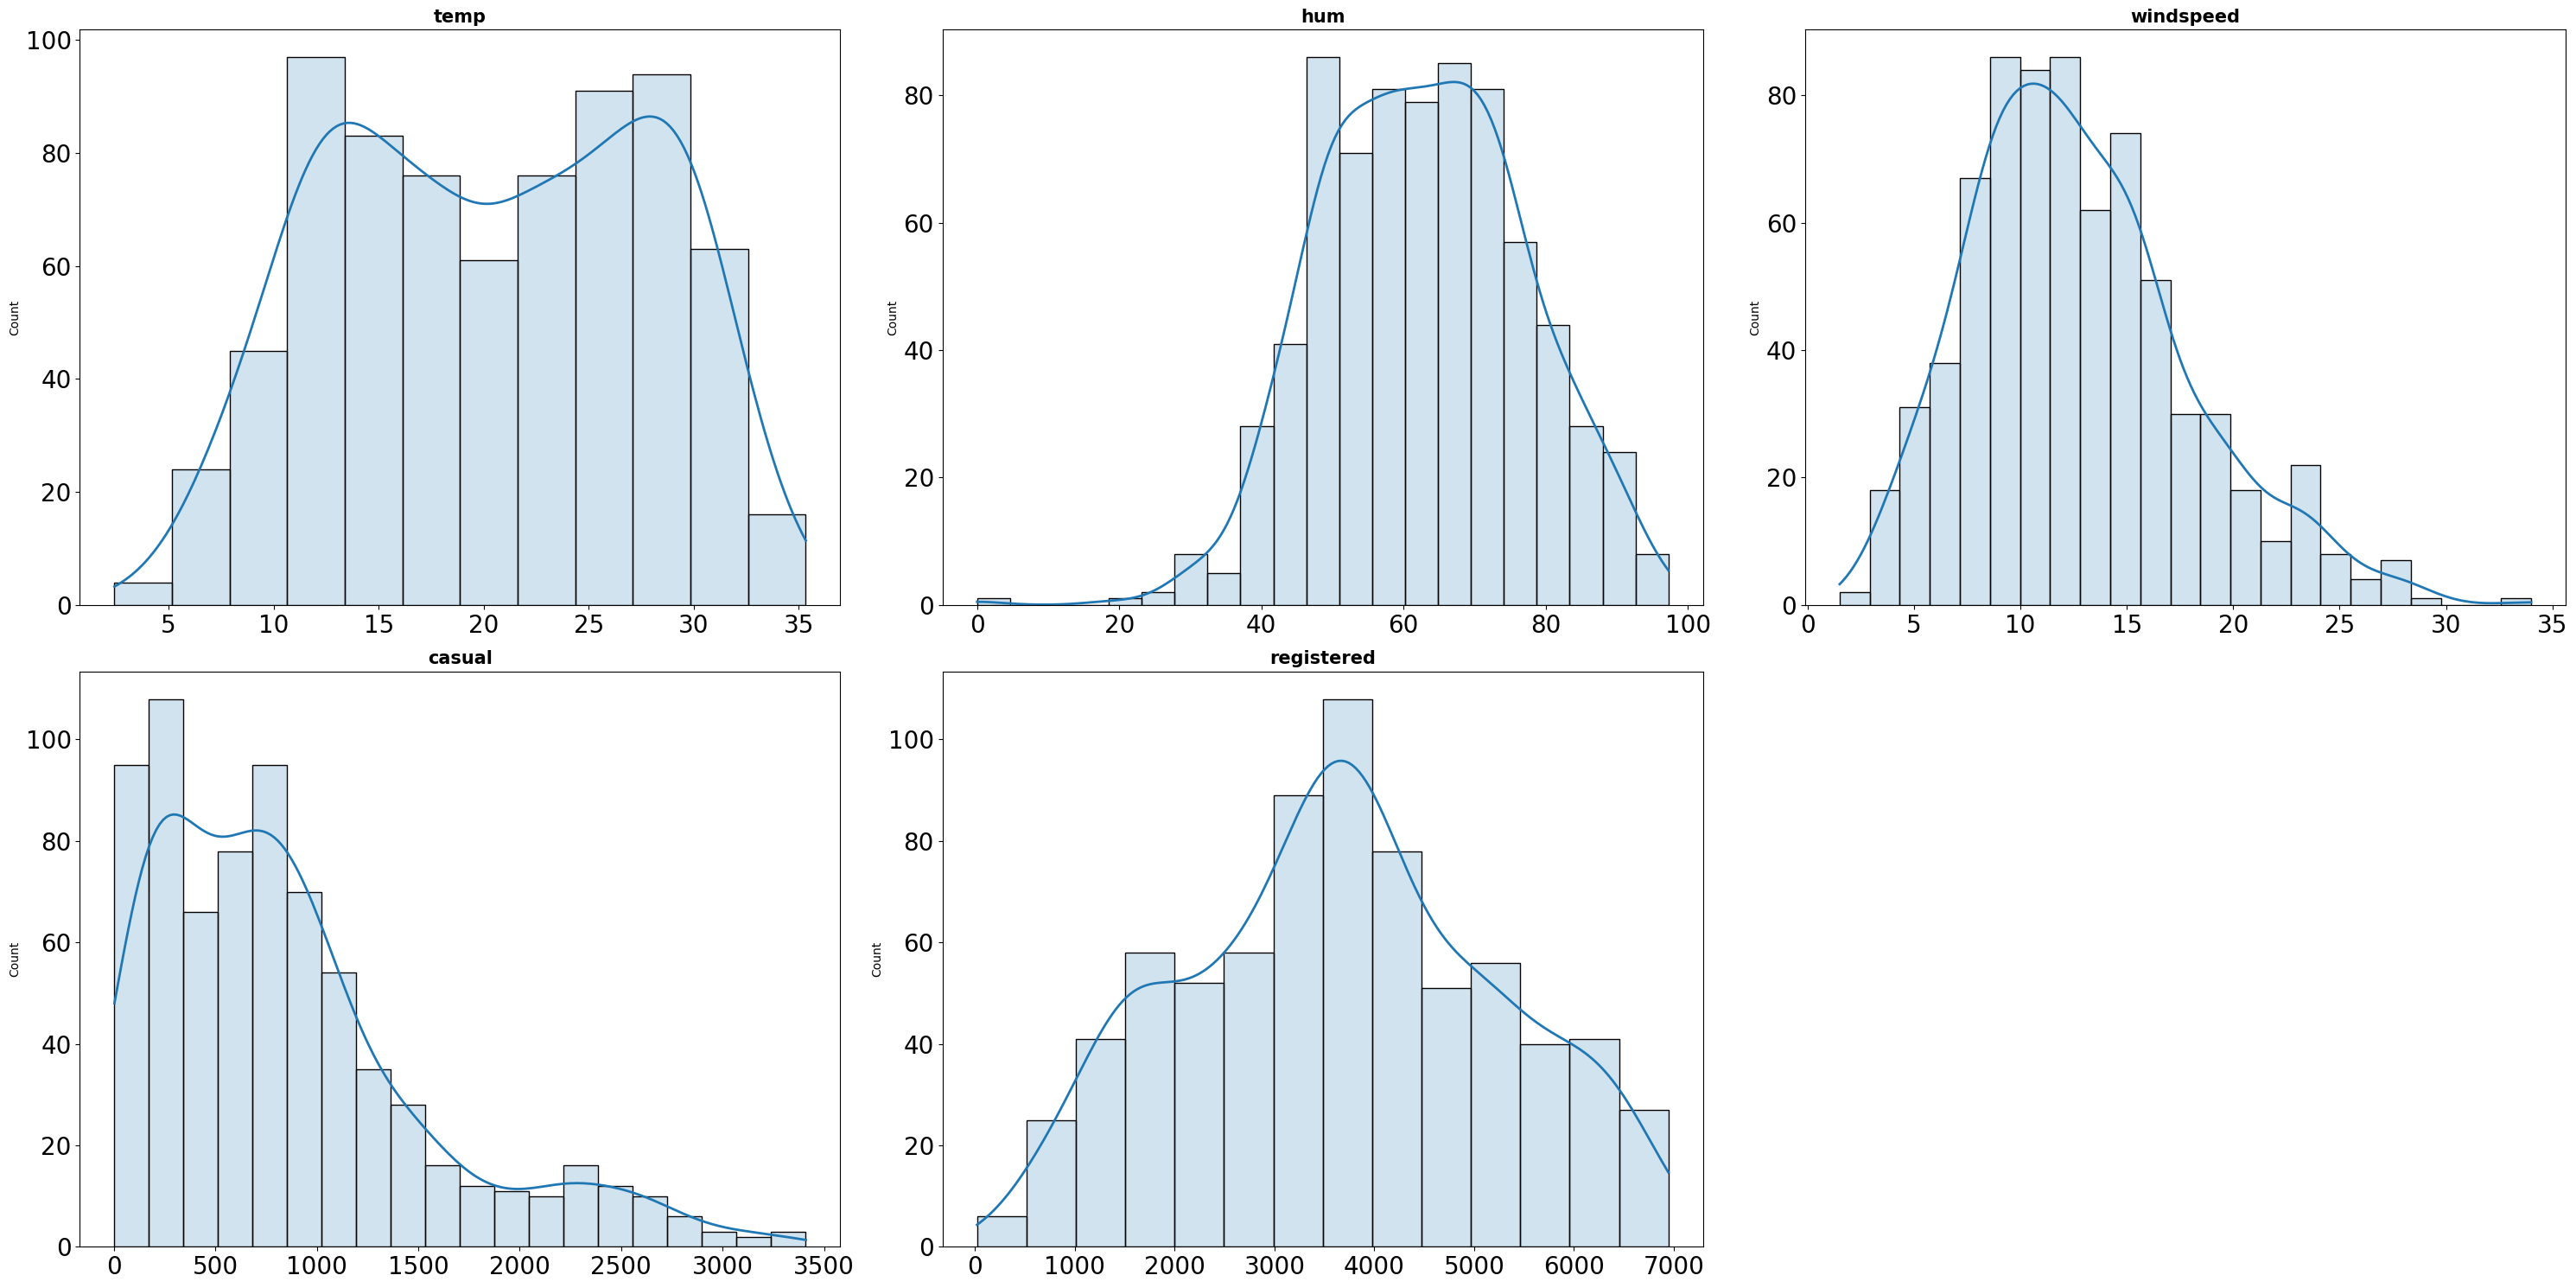

In [7]:
# sacamos las distribuciones de las variables para comprobar que no cambian tras la estandarización
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 15))

axes = axes.flat

for i, colum in enumerate(numericas.columns): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1]);

Utilizamos el RobustScaler porque tenemos bastantes outliers con los que lidiar

In [8]:
robust = RobustScaler()

In [9]:
robust.fit(numericas)

RobustScaler()

In [10]:
X_robust = robust.transform(numericas)

In [11]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna temp es:  -0.01121511337530535
La desviación estándar de la columna temp es: 0.5744038804193734
-------------------------------------------------------------
La media de la columna hum es:  0.006678312043328619
La desviación estándar de la columna hum es: 0.6783171666603843
-------------------------------------------------------------
La media de la columna windspeed es:  0.09694722724811505
La desviación estándar de la columna windspeed es: 0.7891689924205268
-------------------------------------------------------------
La media de la columna casual es:  0.1694960782678541
La desviación estándar de la columna casual es: 0.8798204095282787
-------------------------------------------------------------
La media de la columna registered es:  -0.002517521154504448
La desviación estándar de la columna registered es: 0.6838047908783863
-------------------------------------------------------------


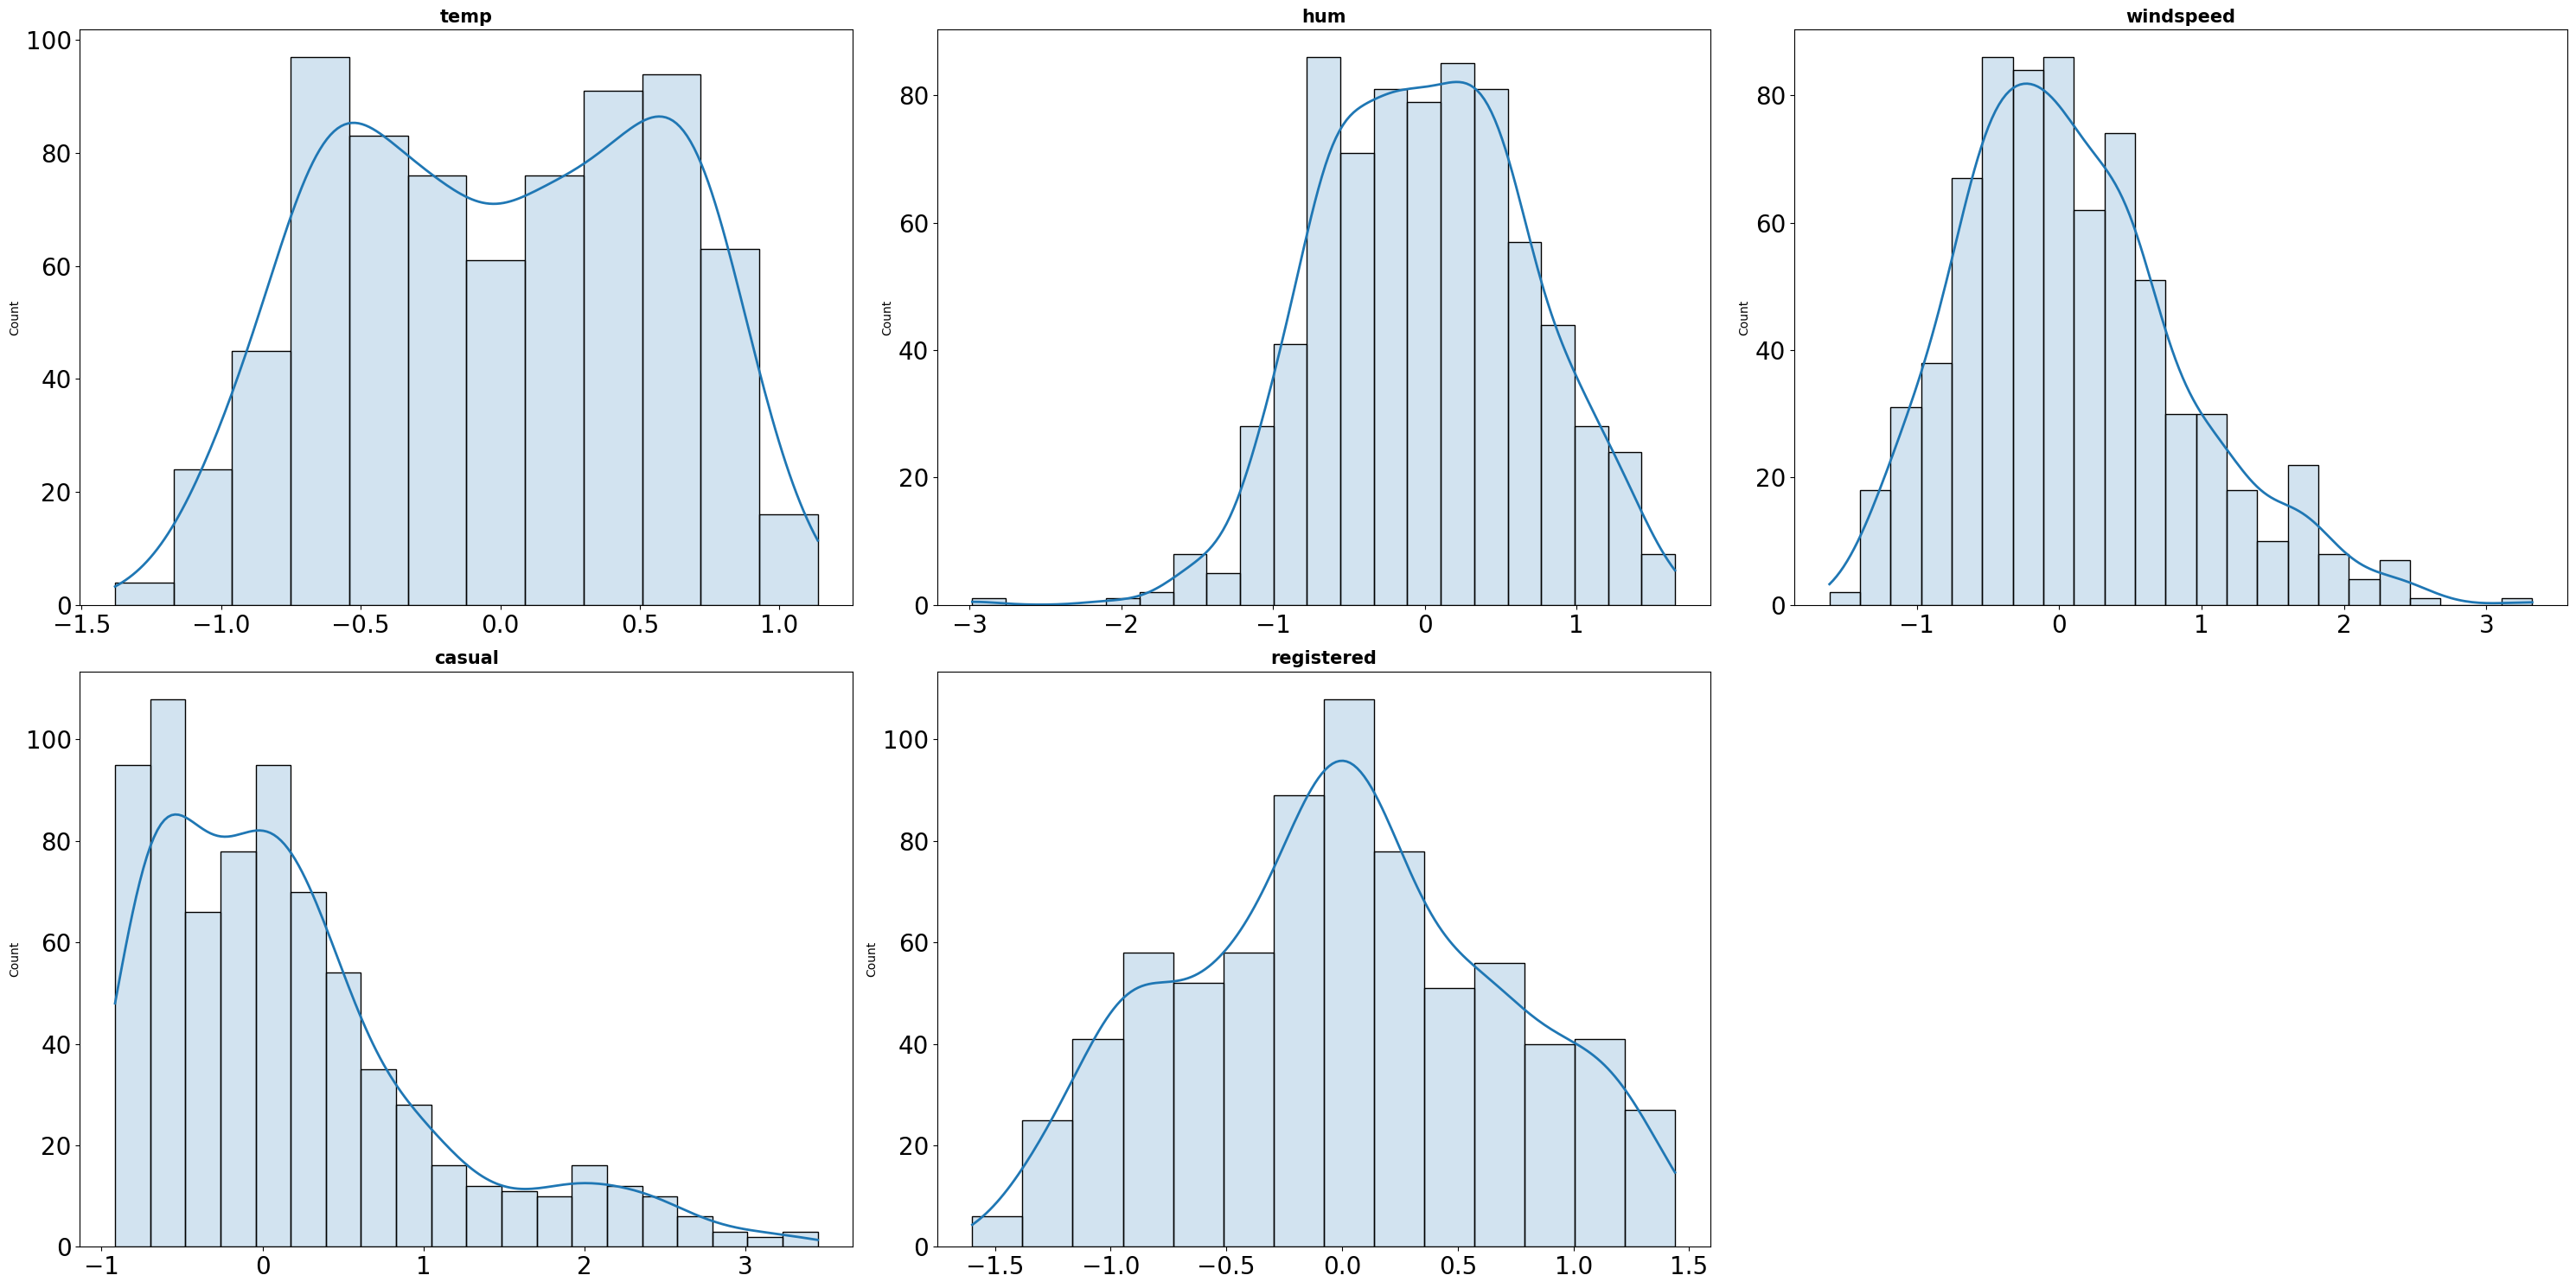

In [12]:
# comprobamos las distribuciones de las variables tras la estandarización
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 15))

columnas_robust = numericas_robust.columns
axes = axes.flat

for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1]);